<a href="https://colab.research.google.com/github/AllamElsheikh/Projects/blob/main/International_football_results_by_ALLAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intretnational football match from 1872 to 2017...
Winner preciction
the used data is form kaggle in the url("https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017")

## Importing the libraries and the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('international_matches.csv')
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## data filterring

In [ ]:
df.shape

(23921, 25)

In [ ]:
null = df.isnull().sum() / len(df)

In [ ]:
key = null[null < .5].keys()
df1 = df[key]
df1.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose


In [ ]:
df1 = df1.set_index(pd.to_datetime(df1['date']) )
del df1['date']
df1.head()

,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result
date,,,,,,,,,,,,,,,,
1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win
1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw
1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win
1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win
1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose


In [ ]:
df1 = df1.drop(['home_team_continent'	, 'away_team_continent' ], axis =1)

In [ ]:
df1['home_team'].value_counts()

Mexico                      316
USA                         314
Japan                       280
Saudi Arabia                272
Korea Republic              249
                           ... 
Timor-Leste                  16
Tonga                        15
Anguilla                     13
Cook Islands                 10
Turks and Caicos Islands      8
Name: home_team, Length: 211, dtype: int64

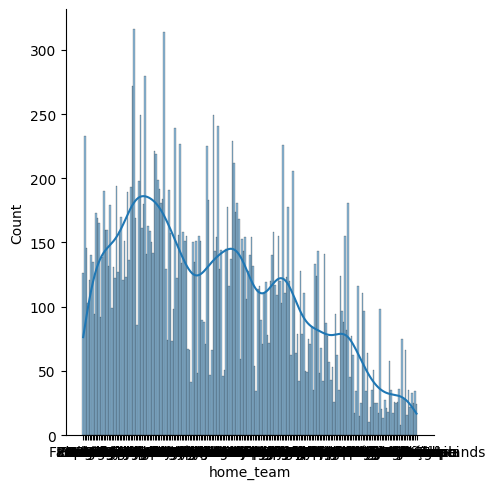

In [ ]:
sns.displot(df1['home_team'] , bins =5 , kde = True )

In [ ]:
value = df1['home_team'].value_counts()
home_less_10 = value[value <20]
home_less_10

Montserrat                  18
American Samoa              17
Brunei Darussalam           17
São Tomé and Príncipe       17
Timor-Leste                 16
Tonga                       15
Anguilla                    13
Cook Islands                10
Turks and Caicos Islands     8
Name: home_team, dtype: int64

In [ ]:
df1['home_team'] = df1['home_team'].apply(lambda x : 'other' if x in home_less_10 else x)

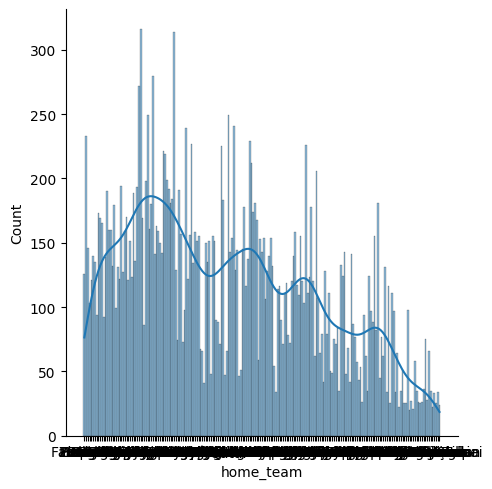

In [ ]:
sns.displot(df1['home_team'] , bins =5 , kde = True )

In [ ]:
df1['away_team'].value_counts()

Zambia                      243
Costa Rica                  217
Paraguay                    216
Sweden                      206
Mexico                      201
                           ... 
Bahamas                      20
Turks and Caicos Islands     18
Montserrat                   18
American Samoa               14
Samoa                        14
Name: away_team, Length: 211, dtype: int64

In [ ]:
value = df1['away_team'].value_counts()
home_less_25 = value[value <25]
home_less_25

Tonga                       24
Cook Islands                21
Bahamas                     20
Turks and Caicos Islands    18
Montserrat                  18
American Samoa              14
Samoa                       14
Name: away_team, dtype: int64

In [ ]:
df1['away_team'] =df1['away_team'].apply(lambda x: 'other' if x in home_less_25 else x)

In [ ]:
df1.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result
date,,,,,,,,,,,,,,
1993-08-08,Bolivia,Uruguay,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win
1993-08-08,Brazil,Mexico,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw
1993-08-08,Ecuador,Venezuela,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win
1993-08-08,Guinea,Sierra Leone,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win
1993-08-08,Paraguay,Argentina,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose


In [ ]:
df1.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result'],
      dtype='object')

In [ ]:
df2 = df1[[ 'home_team_fifa_rank', 'away_team_fifa_rank',
           'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score',   'neutral_location',
            'shoot_out', 'home_team_result']]
df2.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,neutral_location,shoot_out,home_team_result
date,,,,,,,,,
1993-08-08,59,22,0,0,3,1,False,No,Win
1993-08-08,8,14,0,0,1,1,False,No,Draw
1993-08-08,35,94,0,0,5,0,False,No,Win
1993-08-08,65,86,0,0,1,0,False,No,Win
1993-08-08,67,5,0,0,1,3,False,No,Lose


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2['neutral_location'] = encoder.fit_transform(df2['neutral_location'])
df2['shoot_out'] = encoder.fit_transform(df2['shoot_out'])


<ipython-input-20-2061a6a256a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['neutral_location'] = encoder.fit_transform(df2['neutral_location'])
<ipython-input-20-2061a6a256a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['shoot_out'] = encoder.fit_transform(df2['shoot_out'])


In [ ]:
df2['home_team_result'] = df2['home_team_result'].replace({ "Lose":0 , 'Draw' : 0} )

<ipython-input-21-500144e98c84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['home_team_result'] = df2['home_team_result'].replace({ "Lose":0 , 'Draw' : 0} )


In [ ]:
df2['home_team_result'] = df2['home_team_result'].replace({ "Win":1} )

<ipython-input-22-5f09e2f38e4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['home_team_result'] = df2['home_team_result'].replace({ "Win":1} )


In [ ]:
df2.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,neutral_location,shoot_out,home_team_result
date,,,,,,,,,
1993-08-08,59,22,0,0,3,1,0,0,1
1993-08-08,8,14,0,0,1,1,0,0,0
1993-08-08,35,94,0,0,5,0,0,0,1
1993-08-08,65,86,0,0,1,0,0,0,1
1993-08-08,67,5,0,0,1,3,0,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23921 entries, 1993-08-08 to 2022-06-14
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   home_team_fifa_rank          23921 non-null  int64
 1   away_team_fifa_rank          23921 non-null  int64
 2   home_team_total_fifa_points  23921 non-null  int64
 3   away_team_total_fifa_points  23921 non-null  int64
 4   home_team_score              23921 non-null  int64
 5   away_team_score              23921 non-null  int64
 6   neutral_location             23921 non-null  int64
 7   shoot_out                    23921 non-null  int64
 8   home_team_result             23921 non-null  int64
dtypes: int64(9)
memory usage: 1.8 MB


## ploting the data

<ipython-input-35-246760d5e03f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['home_team_fifa_rank']);


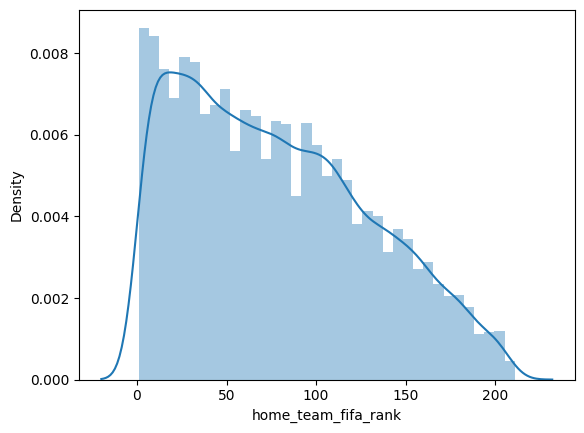

In [ ]:
sns.distplot(df2['home_team_fifa_rank']);

<ipython-input-40-ab83cdcfb0fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['home_team_total_fifa_points'])


<Axes: xlabel='home_team_total_fifa_points', ylabel='Density'>

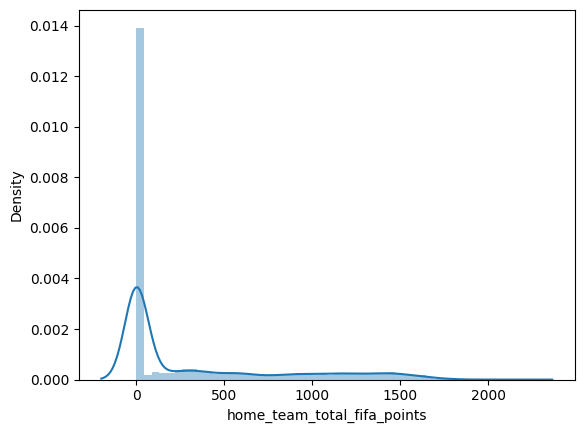

In [ ]:
#sns.barplot(df2['home_team_total_fifa_points'])
sns.distplot(df2['home_team_total_fifa_points'])

<ipython-input-43-f935d287902b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['home_team_score'])


<Axes: xlabel='home_team_score', ylabel='Density'>

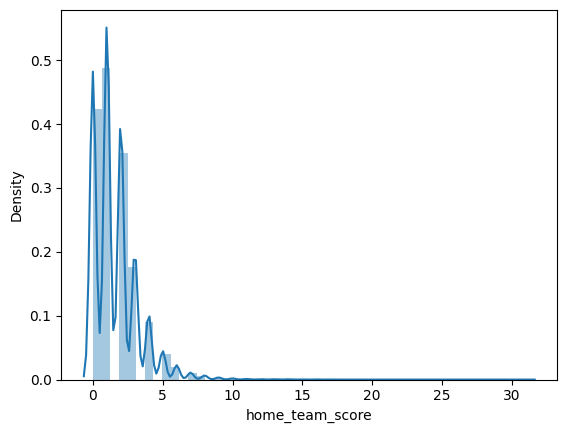

In [ ]:
sns.distplot(df2['home_team_score'])

## Building the model

### splitting the data

In [ ]:
df2.columns

Index(['home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'neutral_location', 'shoot_out',
       'home_team_result'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
predictores = ['home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'neutral_location', 'shoot_out']
target = 'home_team_result'
x = df2[predictores]
y = df2[target]
print(x.shape)
print(y.shape)

(23921, 8)
(23921,)


In [ ]:
x_train ,x_test ,y_train , y_test = train_test_split(x , y , random_state= 42 , test_size = .2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19136, 8)
(4785, 8)
(19136,)
(4785,)


### Build the model

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2413
           1       0.99      0.99      0.99      2372

    accuracy                           0.99      4785
   macro avg       0.99      0.99      0.99      4785
weighted avg       0.99      0.99      0.99      4785



<Axes: >

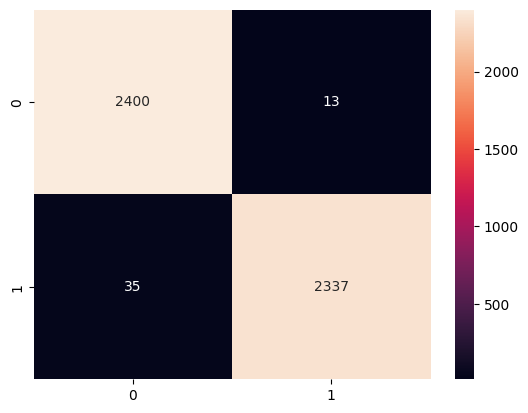

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , precision_score
rfc = RandomForestClassifier(n_estimators = 50 , max_depth = 50)
rfc.fit(x_train , y_train)
y_pred = rfc.predict(x_test)
report = classification_report(y_test , y_pred)
conf = confusion_matrix(y_test , y_pred)
print(report)
sns.heatmap(conf  , annot= True , fmt='d')

In [ ]:
precision_score(y_test , y_pred)

0.994468085106383

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2413
           1       0.99      0.99      0.99      2372

    accuracy                           0.99      4785
   macro avg       0.99      0.99      0.99      4785
weighted avg       0.99      0.99      0.99      4785



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

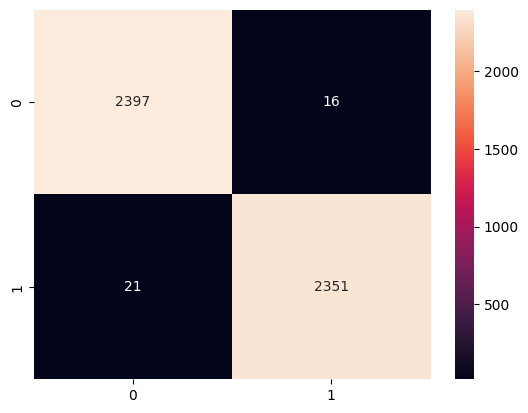

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
report = classification_report(y_test , y_pred)
conf = confusion_matrix(y_test , y_pred)
print(report)
sns.heatmap(conf  , annot= True , fmt='d')